In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
%config InlineBackend.figure_format = "svg"

In [2]:
df = pd.read_csv("/Users/nouf/Desktop/Airbnb_price_prediction/train.csv")

In [3]:
df

id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
0            1.0  Real Bed              strict          True  ...  40.696524   
1            1.0  Real Bed              strict          True  ...  40.766115   
2            1.0  Real Bed            moderate          True  ...  40.808110   
3            1.0  Real Bed            flexible          True  ...  37.772004   
4            1.0  Real Bed            moderate          True  ...  38.925627   
...          ...       ...                 ...           ...  ...        ...   
74106        1.0  Real Bed            flexible         False  ...  40.709025   
74107        2.0  Real Bed            moderate          True  ...  33.871549   
74108        1.0  Real Bed            moderate          True  ...  40.706749   
74109        1.0  Real Bed              strict          True  ...  40.738535   
74110        1.0  Real Bed            moderate         False  ...  33.761096   

        longitude                                        name  \
0      -73.991617              Beautiful brownstone 1-bedroom   
1      -73.989040    Superb 3BR Apt Located Near Times Square   
2      -73.943756                            The Garden Oasis   
3     -122.431619          Beautiful Flat in the Heart of SF!   
4      -77.034596                  Great studio in midtown DC   
...           ...                                         ...   
74106  -73.939405                           one room bushwick   
74107 -118.396053                Spacious Hermosa 2 BR on PCH   
74108  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   
74109  -74.000157        Designer's Apartment in HEART of NYC   
74110 -118.192409              Cozy Boat at Shoreline Village   

          neighbourhood number_of_reviews review_scores_rating  \
0      Brooklyn Heights                 2                100.0   
1        Hell's Kitchen                 6                 93.0   
2                Harlem                10                 92.0   
3          Lower Haight                 0                  NaN   
4      Columbia Heights                 4                 40.0   
...                 ...               ...                  ...   
74106      Williamsburg                 0                  NaN   
74107     Hermosa Beach                16                 93.0   
74108      Williamsburg                43              

In [4]:
df["beds"].unique()

array([ 1.,  3.,  2.,  7.,  4.,  6.,  5., nan, 10.,  8., 16.,  9., 13.,
       12., 11., 14., 15.,  0., 18.])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [6]:
df.describe()

id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.836556      0.852143   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342374           1.000000             92.000000      1.000000   
50%      -76.996965           6.000000             96.000000      1.000000   
75%      -73.954660          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73980.000000  
mean       1.710868  
std        1.254142  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


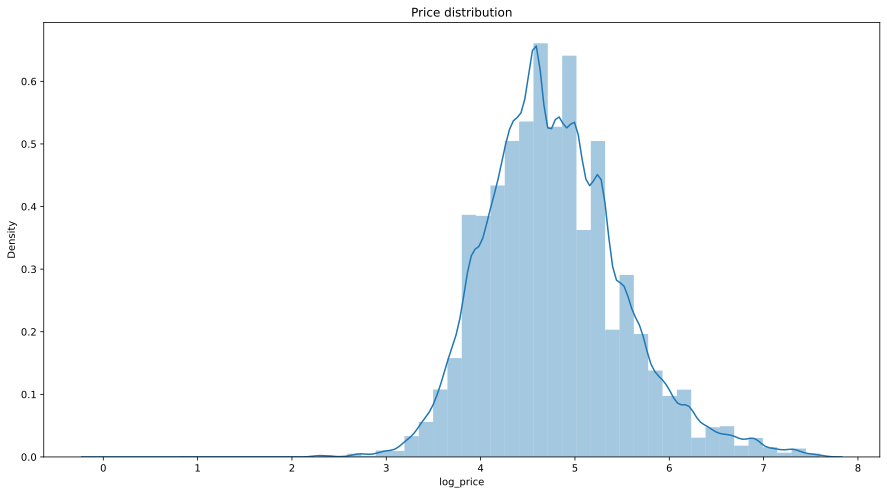

In [7]:
plt.figure(figsize = (15, 8))
sns.distplot(df['log_price'])
plt.title('Price distribution')
plt.show()

In [10]:
#qqplot(df['log_price'])

# Property type

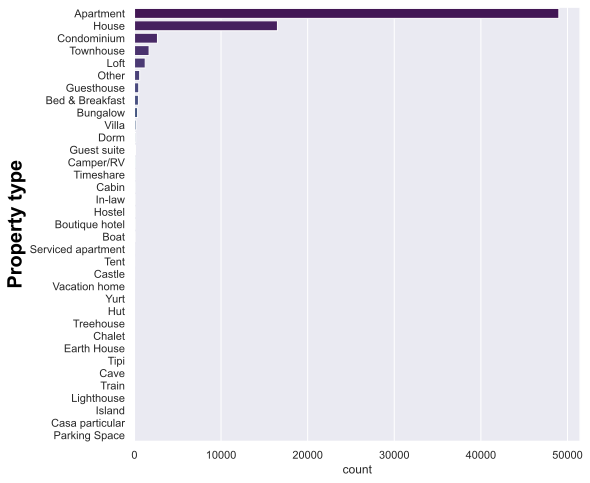

In [11]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'property_type',data = df,order = df['property_type'].value_counts().index,palette = "viridis")
plt.ylabel('Property type',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

# Room type

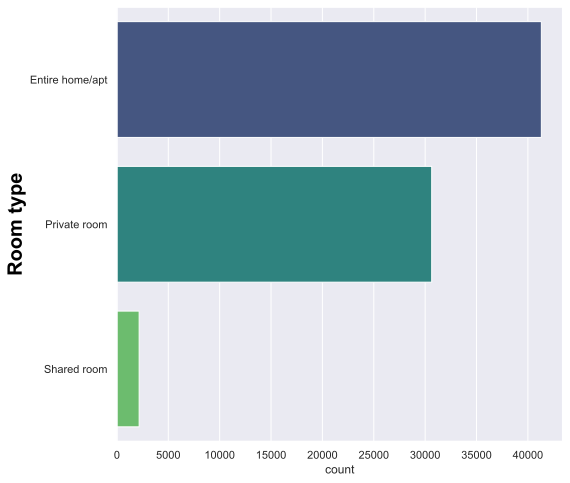

In [12]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'room_type',data = df,order = df['room_type'].value_counts().index,palette = "viridis")
plt.ylabel('Room type',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

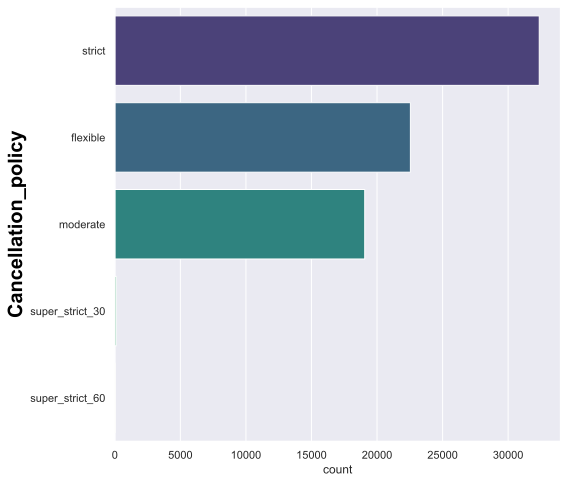

In [13]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'cancellation_policy',data = df,order = df['cancellation_policy'].value_counts().index,palette = "viridis")
plt.ylabel('Cancellation_policy',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

# cancellation policy

<AxesSubplot:title={'center':'cancellation policy'}, ylabel='cancellation_policy'>

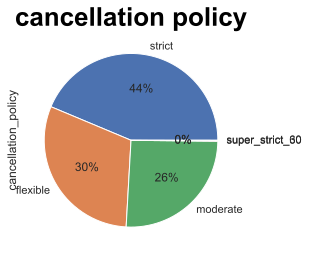

In [14]:
plt.title("cancellation policy",fontsize=26, weight = 'bold',color="black")
df['cancellation_policy'].value_counts().plot.pie(autopct='%1.0f%%')

# Cancellation policy

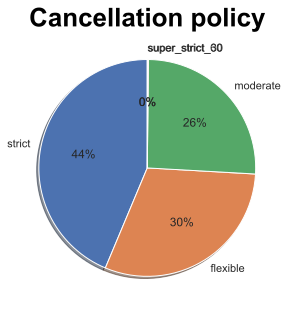

In [15]:
df_g=df['cancellation_policy'].value_counts()
labels=df_g.index
fig,ax1=plt.subplots(1,1,figsize=(5,5))
ax1.pie(df_g,labels=labels, autopct='%1.0f%%',shadow=True, startangle=90)
plt.title("Cancellation policy",fontsize=26, weight = 'bold',color="black")
plt.show()

# City

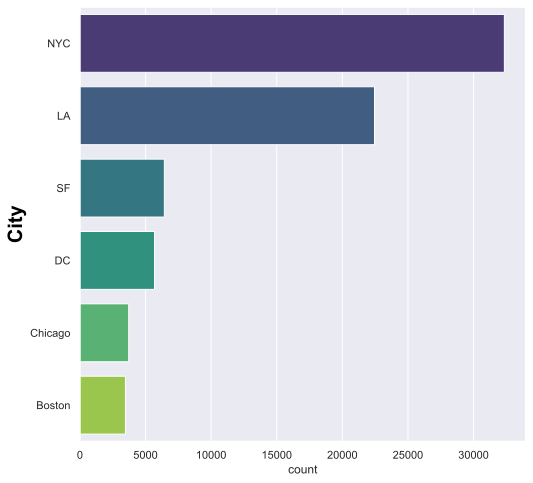

In [16]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'city',data = df,order = df['city'].value_counts().index,palette = "viridis")
plt.ylabel('City',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

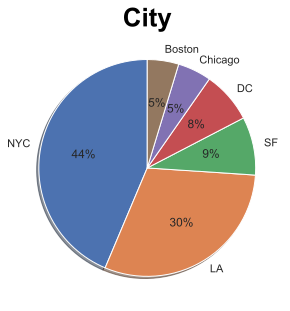

In [18]:
df_g=df['city'].value_counts()
labels=df_g.index
fig,ax1=plt.subplots(1,1,figsize=(5,5))
ax1.pie(df_g,labels=labels, autopct='%1.0f%%',shadow=True, startangle=90)
plt.title("City",fontsize=26, weight = 'bold',color="black")
plt.show()

In [24]:
df['neighbourhood'].value_counts()

Williamsburg          2862
Bedford-Stuyvesant    2166
Bushwick              1601
Upper West Side       1396
Mid-Wilshire          1392
                      ... 
Arrochar                 1
Garfield Heights         1
Newton                   1
Wilmington               1
Dongan Hills             1
Name: neighbourhood, Length: 619, dtype: int64

<ipython-input-34-10b2bf15a241>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set(facecolor = "White")


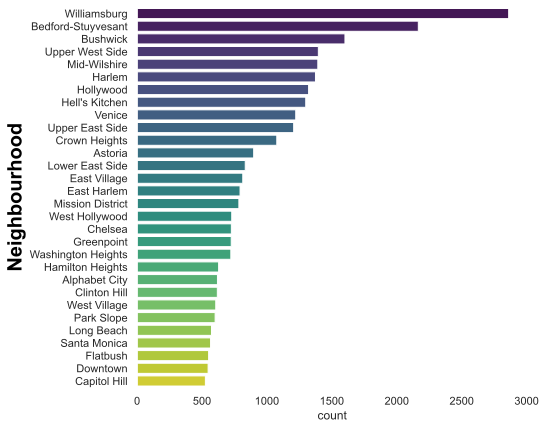

In [34]:
sns.set(style='darkgrid')
plt.figure(figsize=(7,7))
sns.countplot(y = 'neighbourhood',
              data = df,
              order = df['neighbourhood'].value_counts().sort_values(ascending= False).head(30).index,palette= 'viridis')
plt.ylabel('Neighbourhood',fontsize = 20, weight = 'bold',color='black')
plt.axes().set(facecolor = "White")
plt.show()

<AxesSubplot:ylabel='neighbourhood'>

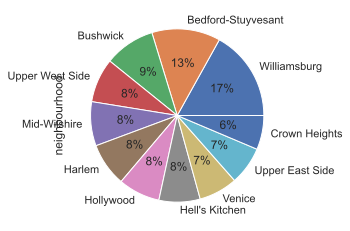

In [32]:
neighbourhood_morethan_1000 = df.neighbourhood.value_counts()
neighbourhood_morethan_1000 [neighbourhood_morethan_1000 >1000].plot.pie(autopct='%1.0f%%')

<AxesSubplot:>

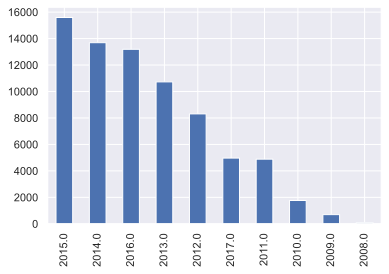

In [40]:
years =  pd.to_datetime(df['host_since'], format='%Y-%m-%d', errors='coerce').dt.year
years.value_counts().plot.bar()

In [41]:
years =  pd.to_datetime(df['host_since'], format='%Y-%m-%d', errors='coerce')
years.value_counts().plot.bar()

<AxesSubplot:>